In [3]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

directoryPath = os.path.join('results_synthetic_reg/')

final_results = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.csv'):
    file = pd.read_csv(file_name, low_memory=False)
    final_results = pd.concat([final_results,file], axis=0)


sigma_arr = np.unique(final_results['sigma'])
n = len(np.unique(final_results['seed']))
final_results_sigma01 = final_results[final_results['sigma']==0.1]
final_results_sigma001 = final_results[final_results['sigma']==0.01]
final_results_sigma0 = final_results[final_results['sigma']==0]

final_results_mean = final_results.groupby('sigma').mean()
final_results_std = final_results.groupby('sigma').std()/np.sqrt(n)
final_results
# final_results.to_csv('final_results.csv')

,seed,sigma,coverage,length,coverage t noise,length t,"coverage t noise, noisy train","length t, noisy train",coverage gaussian noise,length gaussian,...,"coverage dispersive noise, dispersive noisy train","length dispersive, dispersive noisy train","coverage clean, dispersive noisy train","length clean, dispersive noisy train",coverage positive noise,length positive,coverage W2R noise,length W2R,"coverage positive noise, positive noisy train","length positive, positive noisy train"
0,9,1.00,90.06,1.8016,99.48,13.1605,99.48,13.8229,98.94,4.1094,...,96.04,2.2302,88.82,1.8452,99.48,12.5112,82.78,1.7087,70.56,9.3259
0,9,0.10,90.06,1.8016,96.04,2.7380,97.70,2.7791,93.80,1.9023,...,96.04,2.2302,88.82,1.8452,95.90,2.2238,82.78,1.7087,87.72,2.3312
0,9,0.01,90.06,1.8016,92.10,1.8480,92.02,1.9013,89.82,1.7974,...,96.04,2.2302,88.82,1.8452,90.18,1.8040,82.78,1.7087,88.88,1.9129
0,9,0.00,90.06,1.8016,90.06,1.8016,90.06,1.8016,90.06,1.8016,...,96.04,2.2302,88.82,1.8452,90.06,1.8016,82.78,1.7087,90.06,1.8016
0,8,1.00,89.66,1.7227,99.14,15.0753,99.18,15.2723,98.26,4.3332,...,94.44,2.1772,89.80,1.7772,99.14,12.3884,83.88,1.6340,58.42,9.2618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11,0.00,90.04,1.8099,90.04,1.8099,90.04,1.8099,90.04,1.8099,...,95.40,2.3229,90.54,1.8619,90.04,1.8099,83.62,1.7271,90.04,1.8099
0,10,1.00,88.30,1.7392,99.16,14.0241,99.14,14.7806,98.42,4.0728,...,94.98,2.1691,88.42,1.7713,99.14,11.6726,81.40,1.6596,57.46,9.6519
0,10,0.10,88.30,1.7392,95.26,2.6074,96.56,2.6134,93.28,1.8706,...,94.98,2.1691,88.42,1.7713,95.00,2.1092,81.40,1.6596,85.52,2.3318
0,10,0.01,88.30,1.7392,90.64,1.7794,90.28,1.8219,87.98,1.7349,...,94.98,2.1691,88.42,1.7713,87.96,1.7345,81.40,1.6596,87.74,1.8749


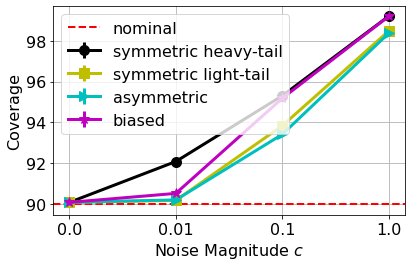

In [4]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_mean['coverage t noise'], yerr=final_results_std['coverage t noise'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_mean['coverage gaussian noise'], yerr=final_results_std['coverage gaussian noise'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_mean['coverage gumbel noise'], yerr=final_results_std['coverage gumbel noise'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_mean['coverage positive noise'], yerr=final_results_std['coverage positive noise'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=90, label='nominal', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Coverage')
plt.legend()
plt.grid()
fig.tight_layout()
plt.savefig('coverage_clean_train.pdf')
# plt.xscale('log')
plt.show()

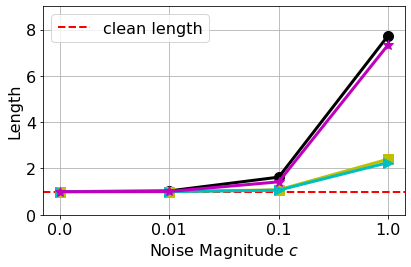

In [5]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_mean['length t']/final_results_mean['length'], yerr=final_results_std['length t'], color='k', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_mean['length gaussian']/final_results_mean['length'], yerr=final_results_std['length gaussian'], color='y', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_mean['length gumbel']/final_results_mean['length'], yerr=final_results_std['length gumbel'], color='c', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_mean['length positive']/final_results_mean['length'], yerr=final_results_std['length positive'], color='m', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=1, label='clean length', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Length')
plt.legend()
plt.grid()
plt.ylim([0,9])
fig.tight_layout()
plt.savefig('length_clean_train.pdf')
plt.show()

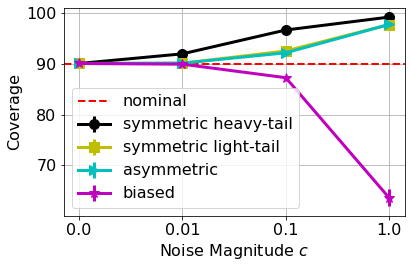

In [6]:
fig = plt.figure(figsize=([6,4]))
plt.errorbar(values, final_results_mean['coverage t noise, noisy train'], yerr=final_results_std['coverage t noise, noisy train'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_mean['coverage gaussian noise, noisy train'], yerr=final_results_std['coverage gaussian noise, noisy train'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_mean['coverage gumbel noise, noisy train'], yerr=final_results_std['coverage gumbel noise, noisy train'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_mean['coverage positive noise, positive noisy train'], yerr=final_results_std['coverage positive noise, positive noisy train'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
values = range(len(sigma_arr))
plt.xticks(values, sigma_arr)
plt.axhline(y=90, label='nominal', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Coverage')
plt.legend()
plt.grid()
# plt.xscale('log')
fig.tight_layout()
plt.savefig('coverage_noisy_train.pdf')
plt.show()

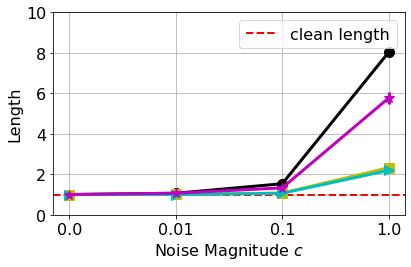

In [7]:
fig = plt.figure(figsize=([6,4]))
plt.errorbar(values, final_results_mean['length t, noisy train']/final_results_mean['length t, noisy train'][0], yerr=final_results_std['length t, noisy train'], color='k', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_mean['length gaussian, noisy train']/final_results_mean['length gaussian, noisy train'][0], yerr=final_results_std['length gaussian, noisy train'], color='y', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_mean['length gumbel, noisy train']/final_results_mean['length gumbel, noisy train'][0], yerr=final_results_std['length gumbel, noisy train'], color='c', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_mean['length positive, positive noisy train']/final_results_mean['length positive, positive noisy train'][0], yerr=final_results_std['length positive, positive noisy train'], color='m', linewidth=3, marker='*', markersize=10)
values = range(len(sigma_arr))
plt.xticks(values, sigma_arr)
plt.axhline(y=1, label='clean length', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Length')
plt.legend()
plt.grid()
plt.ylim([0,10])
fig.tight_layout()
plt.savefig('length_noisy_train.pdf')
plt.show()

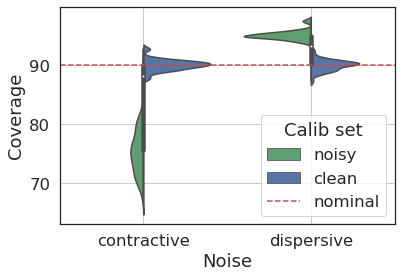

In [24]:
final_results_all = pd.read_csv('final_results.csv')
final_results_clean_calib = final_results_all[final_results_all['Calib']=='clean']
final_results_all_clean_tr = final_results_all[final_results_all['Train']=='clean']
final_results_all_noisy_tr = final_results_all[final_results_all['Train']!='clean']
# final_results_all_noisy_tr_clean_calib = final_results_all_noisy_tr[final_results_all_noisy_tr['Calib']=='clean']
# final_results_all_noisy_tr['Length'] = final_results_all_noisy_tr['Length']/np.mean(np.asarray(final_results_all_noisy_tr_clean_calib['Length']))
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(x='Train', y='Coverage', data=final_results_all_noisy_tr, split=True, hue='Calib', palette={"noisy": "g", "clean": "b"})
ax.axhline(y=90, label='nominal', color='r', linestyle='--')
# ax.set_xticklabels([' '])
ax.set(xlabel='Noise')
plt.grid()
plt.legend(loc='lower right', title='Calib set')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('coverage_centered.pdf')

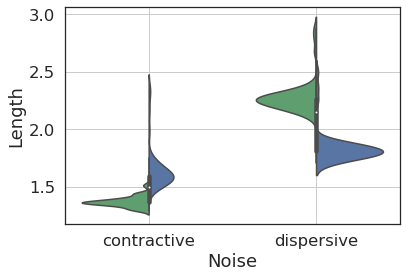

In [26]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(x='Train', y='Length', data=final_results_all_noisy_tr, split=True, hue='Calib', palette={"noisy": "g", "clean": "b"})
ax.set(xlabel='Noise')
plt.grid()
plt.legend([],[], frameon=False)
# plt.legend(loc='upper left', title='Calib set')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('length_centered.pdf')

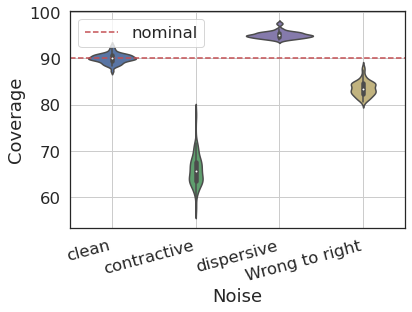

In [28]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
my_pal = {"clean": "b", "contractive": "g", "Wrong to right":'y', 'dispersive':'m'}
ax = sns.violinplot(x='Calib', y='Coverage', data=final_results_all_clean_tr, palette=my_pal)
ax.axhline(y=90, label='nominal', color='r', linestyle='--')
ax.set(xlabel='Noise')
plt.xticks(rotation=15, ha='right')
plt.grid()
plt.legend()
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('coverage_w2r.pdf')

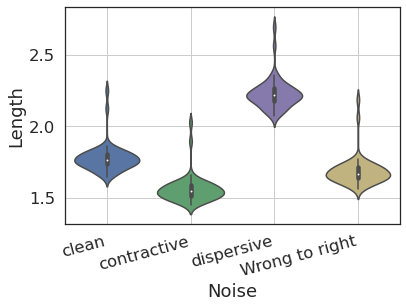

In [29]:
# final_results_all_clean = final_results_all_clean_tr[final_results_all_clean_tr['Noise']=='no']
# final_results_all_clean_tr['Length'] = final_results_all_clean_tr['Length']/np.mean(np.asarray(final_results_all_clean['Length']))
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
# my_pal = {"no": "b", "centered": "g", "W2R":'y'}
ax = sns.violinplot(x='Calib', y='Length', data=final_results_all_clean_tr, palette=my_pal)
ax.set(xlabel='Noise')
plt.xticks(rotation=15, ha='right')
plt.grid()
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('length_w2r.pdf')

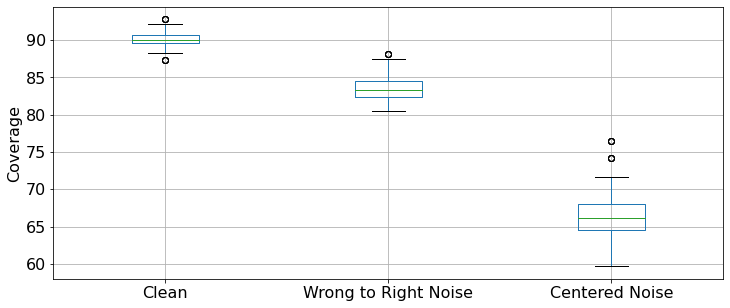

In [15]:
final_results_rename = final_results.rename(columns={'coverage': 'Clean', 'coverage W2R noise': 'Wrong to Right Noise', 'coverage average noise': 'Centered Noise'})
boxplot = final_results_rename.boxplot(column=['Clean','Wrong to Right Noise','Centered Noise'], figsize=(12,5), fontsize='medium') 
plt.ylabel('Coverage')
plt.savefig('coverage_w2r.pdf')
plt.show()

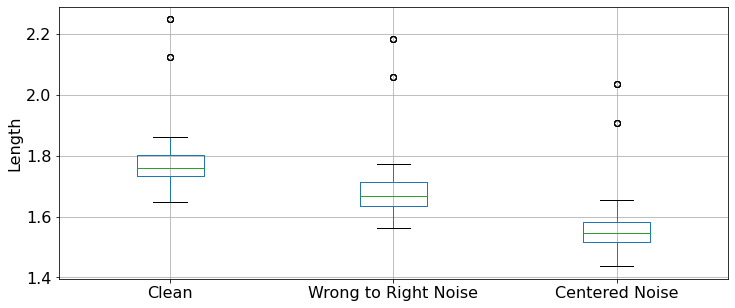

In [16]:
final_results_rename2 = final_results.rename(columns={'length': 'Clean', 'length W2R': 'Wrong to Right Noise', 'length average': 'Centered Noise'})
boxplot = final_results_rename2.boxplot(column=['Clean','Wrong to Right Noise', 'Centered Noise'], figsize=(12,5), fontsize='medium') 
plt.ylabel('Length')
plt.savefig('length_w2r.pdf')
plt.show()

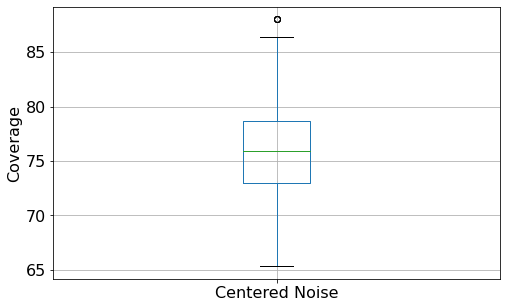

In [17]:
final_results_rename = final_results.rename(columns={'coverage average noise, average noisy train': 'Centered Noise'})
boxplot = final_results_rename.boxplot(column=['Centered Noise'], figsize=(8,5), fontsize=16) 
plt.ylabel('Coverage')
plt.savefig('coverage_centered.pdf')
plt.show()

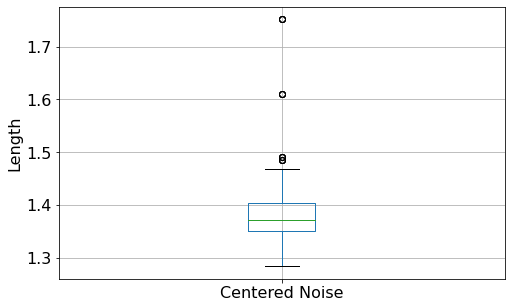

In [19]:
final_results_rename = final_results.rename(columns={'length average, average noisy train': 'Centered Noise'})
boxplot = final_results_rename.boxplot(column=['Centered Noise'], figsize=(8,5), fontsize=16) 
plt.ylabel('Length')
plt.savefig('length_centered.pdf')
plt.show()

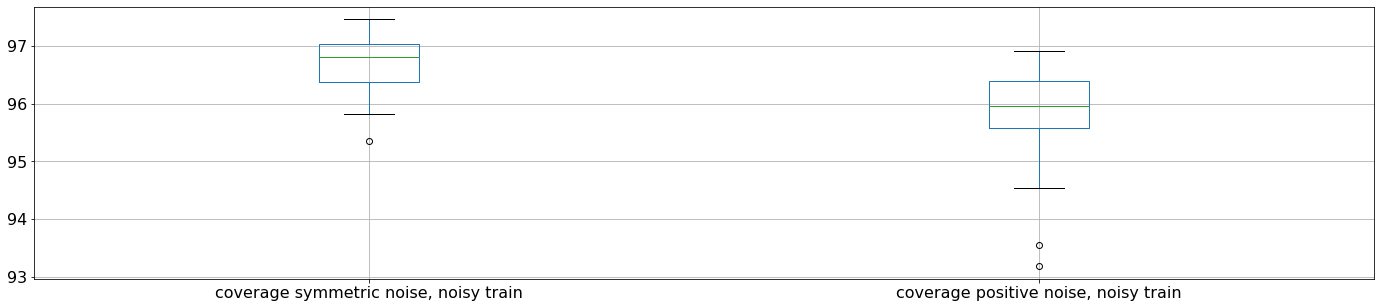

In [8]:
boxplot = final_results_sigma01.boxplot(column=['coverage symmetric noise, noisy train','coverage positive noise, noisy train'], figsize=(24,5), fontsize='medium') 

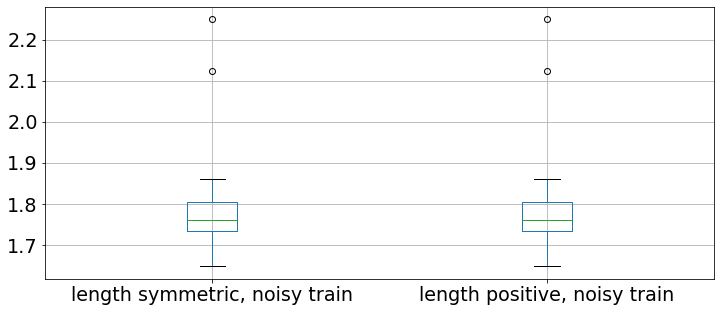

In [9]:
boxplot = final_results_sigma0.boxplot(column=['length symmetric, noisy train', 'length positive, noisy train'], figsize=(12,5), fontsize='large') 

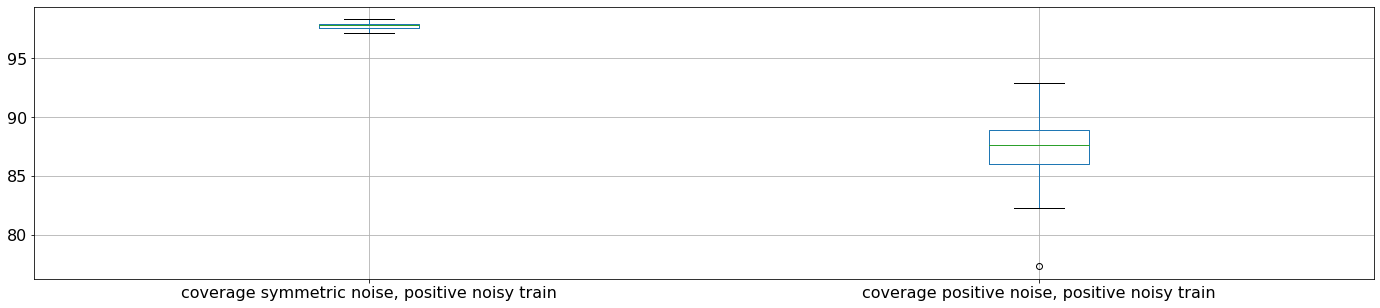

In [21]:
boxplot = final_results_sigma01.boxplot(column=['coverage symmetric noise, positive noisy train','coverage positive noise, positive noisy train'], figsize=(24,5), fontsize='medium') 

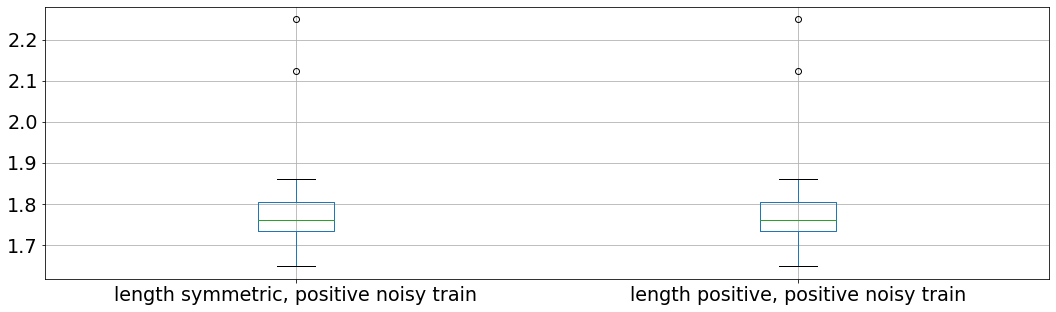

In [22]:
boxplot = final_results_sigma0.boxplot(column=['length symmetric, positive noisy train', 'length positive, positive noisy train'], figsize=(18,5), fontsize='large') 